In [1]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [2]:
from display_network import *

mndata = MNIST('C:/Users/dell_5560/Documents/Python/MNIST/')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 1.         -0.18620833 -0.18620833 ... -0.18620833 -0.18620833
   1.        ]
 [ 1.         -0.18620833 -0.18620833 ... -0.18620833 -0.18620833
   1.        ]
 ...
 [ 1.         -0.18209053 -0.18209053 ... -0.18209053 -0.18209053
   1.        ]
 [ 1.         -0.18209053 -0.18209053 ... -0.18209053 -0.18209053
   1.        ]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]


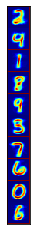

C:\Users\dell_5560\Anaconda2\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [3]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T,K,1)
print(A)
f1 = plt.imshow(A , interpolation = 'nearest' , cmap = 'jet')
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance

cmap = plt.cm.jet
norm = plt.Normalize(vmin = A.min(), vmax= A.max())

# map the normalized data to colors(ánh xạ dữ liệu  chuẩn hóa thành màu sắc)
# image is now RGBA (512x512x4) 

image = cmap(norm(A))

import scipy.misc

scipy.misc.imsave('aa.png', image)

In [4]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


In [5]:
N0 = 20
X1 = np.zeros((N0*K , 784))
X2 = np.zeros((N0*K , 784))

for k in range(K):
    Xk = X0[pred_label == k, :]
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
        
    X1[N0*k : N0*k + N0, :] = Xk[nearest_id, :]
    X2[N0*k : N0*k + N0, :] = Xk[:N0, :]

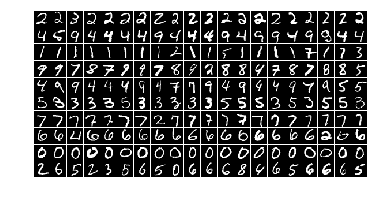

In [6]:
plt.axis('off')
A = display_network(X2.T,K,N0)
f2 = plt.imshow(A,interpolation = 'nearest')
plt.gray()
plt.show()

In [7]:
 #Object Segmentation (tách vật thể trong ảnh)

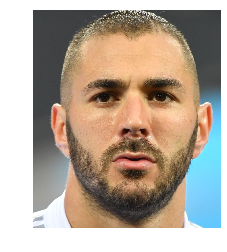

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('benzema.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

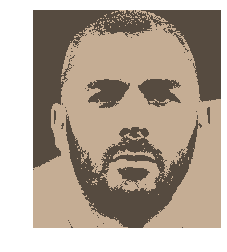

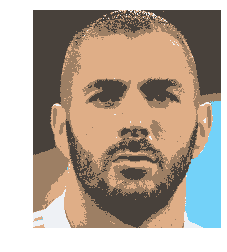

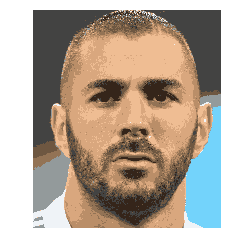

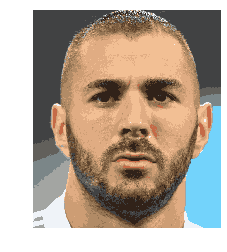

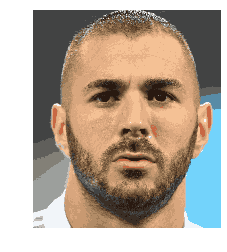

In [10]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

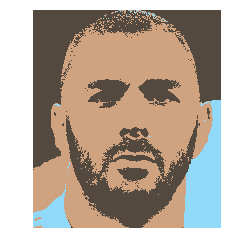

In [11]:
for K in [3]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()
